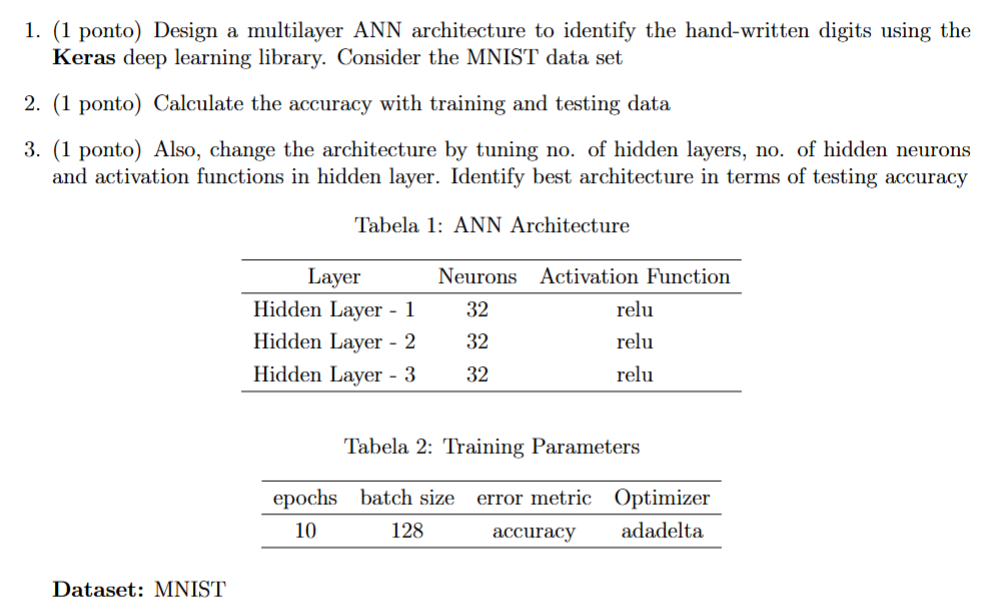

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def mnist_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

model = mnist_model()
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

model.save("mnist_model.h5")

loaded_model = tf.keras.models.load_model("mnist_model.h5")
new_data = tf.random.uniform((1, 28, 28))
predicted_result = loaded_model.predict(new_data)
print("Predicted Digit:", tf.argmax(predicted_result, axis=1).numpy()[0])


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1055 - loss: 2.3067 - val_accuracy: 0.1117 - val_loss: 2.2984
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1050 - loss: 2.2980 - val_accuracy: 0.1180 - val_loss: 2.2877
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1153 - loss: 2.2869 - val_accuracy: 0.1257 - val_loss: 2.2773
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1233 - loss: 2.2751 - val_accuracy: 0.1357 - val_loss: 2.2670
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1313 - loss: 2.2650 - val_accuracy: 0.1458 - val_loss: 2.2569
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1421 - loss: 2.2554 - val_accuracy: 0.1578 - val_loss: 2.2467
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1556 - loss: 2.2452 - val_accuracy: 0.1700 - val_loss: 2.2364
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1643 - loss: 2.2363 - val_accuracy: 0.

Train Accuracy: 0.1988166719675064
Test Accuracy: 0.20880000293254852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted Digit: 1
